In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.W = None
        self.epochs = epochs
        self.lr = lr
        self.errors_ = []

    def predict(self, X):
        """Make predictions for input X (single or batch)"""
        if X.ndim > 1:
            # Add bias (1) to all rows
            X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
            return np.where(np.dot(X_with_bias, self.W) >= 0, 1, -1)
        else:
            # Add bias to single sample
            x_with_bias = np.insert(X, 0, 1)
            return 1 if np.dot(self.W, x_with_bias) >= 0 else -1

    def fit(self, X, y):
        """Train the perceptron model"""
        self.W = np.zeros(X.shape[1] + 1)  # +1 for bias

        for _ in range(self.epochs):
            errors = 0
            for i in range(len(y)):
                x_i = np.insert(X[i], 0, 1)  # Insert bias for each sample
                y_pred = self.predict(X[i])
                error = y[i] - y_pred

                if error != 0:
                    self.W = self.W + self.lr * error * x_i
                    errors += 1


        return self

In [9]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # only use 2 features: sepal length and width
y = iris.target
y = np.where(y == 0, -1, 1)  # binary classification: Setosa vs not-Setosa

In [10]:
# Preprocess
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
# Train model
perceptron = Perceptron(lr=0.1, epochs=100)
perceptron.fit(X_train_std, y_train)

In [12]:
# Plotting function
def plot_decision_regions(X, y, classifier):
    resolution = 0.02
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    X_grid = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(X_grid)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='-1')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='1')
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.legend(loc='upper left')

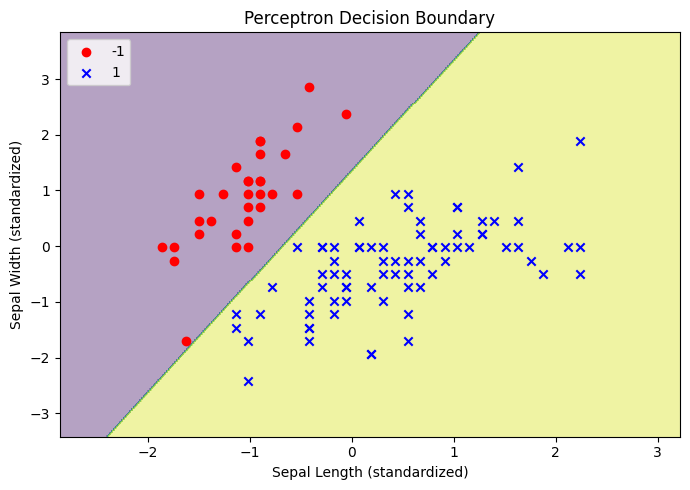

In [13]:
# Show plot
plt.figure(figsize=(7,5))
plot_decision_regions(X_train_std, y_train, perceptron)
plt.title('Perceptron Decision Boundary')
plt.tight_layout()
plt.show()